In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')  # Replace 'your_dataset.csv' with the actual dataset file name

# Display the first few rows of the dataframe


In [3]:
df.head()

# Perform any necessary preprocessing steps here
# For example, handling missing values, encoding categorical variables, etc.

# Example: Handling missing values
df.fillna(method='ffill', inplace=True)


<ipython-input-3-18d3f2847c9b>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:

# Example: Encoding categorical variables
# df = pd.get_dummies(df, columns=['categorical_column'])

# Split the data into features and target variable
X = df.drop('medv', axis=1)  # Replace 'target_column' with the actual target column name
y = df['medv']



In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:

# Train a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [10]:
# Save the model and scaler
import pickle
pickle.dump(model, open('regmodel.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))


In [11]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 24.291119474973513
R^2 Score: 0.668759493535632


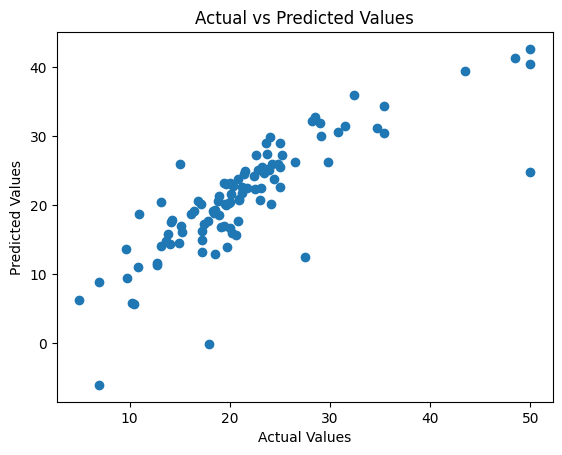

In [12]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()